In [ ]:
!pip install pytorch-lightning
!pip install wandb

USE_COLAB = True
CONTENT_DIR = "/content" if USE_COLAB else "."

import wandb
if not wandb.login():
    raise ValueError("WandDB authentification failed.")
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
import math
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms
import os
import cv2
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import random
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(42)
import numpy as np
from PIL import Image
from torch.utils.data import random_split
from torchvision.datasets import MNIST
import cv2 as cv
from google.colab.patches import cv2_imshow
import pytorch_lightning as pl
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from typing import Optional, List
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pytorch_lightning.loggers import WandbLogger
def _get_clones(module, N):
    return nn.ModuleList([copy.deepcopy(module) for i in range(N)])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 798 kB 6.9 MB/s 
     |████████████████████████████████| 125 kB 64.9 MB/s 
     |████████████████████████████████| 529 kB 11.6 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=1888f5b3ac796cf7921fd3a69e0a15f684f86b08be3a345107285a32c960a948
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 15.3 MB/s 
     |████████████████████████████████| 182 kB 63.5 MB/s 
     |████████████████████████████████| 168 kB 71.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 69.1 MB/s 
   

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Transformer : A Model Used Everywhere



---


Goal of this project:     


*   Understand and code basic Transformer
*   Introduction to Finance
*  Understand our knowledge of deep learning.
* Become Rich ?

**Disclaimer : ANY NON ILLUSTRATED ANALYSIS WILL LEAD TO A 0 TO THE GIVEN PART OF THE LAB**

<img src ="https://i.imgflip.com/6g1fwb.jpg?a463272" height = 200>




---




We have seen through multiple labs industrial applications of Deep Learning models in Computer Vision. Now let's look at another task.

# Transformer : Definitions


## Model


The transformer is a  network architecture based on attention mechanisms. It consists of an encoder-decoder architecture:
* the encoder maps an input sequence of symbol representations $(x_1,…,x_n)$ to a sequence $z=(z_1,…,z_n)$
* the decoder, given $z$ , generates an output sequence $(y_1,…,y_m)$.

At each time step, the model consumes the previously generated symbols as additional input when generating the next (it is auto-regressive)

<img src="https://miro.medium.com/max/1400/1*BHzGVskWGS_3jEcYYi6miQ.png" width= 400>

## Positional Encoding

Transformers work on a sequence of Data. Order does matter.
Example :  


> **Vivre pour manger =! Manger pour vivre.**




For recurrent networks (RNN, LSTM, GRU), the word positions are implicitly embedded inside the model since they are processed sequentially. The Transformer doesn't process sequentially the input. How can we specify the position of a Token ?
The solution of the authors was to add a vector representing the position of the words to the embedding vectors:


> **THE POSITIONAL ENCODING**




## Attention : The reason of this model

Attention , self-attention and multi-head attention are the main component of this model. They let the model know that specific regions or tokens are interesting. They let the model take care of specific parts of the input

# Finance : Is attention all you need ?

In this lab, we will try to create a model able to predict trends in Stock Values. This might be a foundation for a trading bot. We will use a Transformer Encoder to perform this task.

Feel free to download any stock you want.
Some examples of stock :
* S&P500 : https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC ,  https://www.nasdaq.com/market-activity/index/spx/historical
* Bitcoin : https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD,...
* Gold : https://finance.yahoo.com/quote/GC%3DF/history?p=GC%3DF,..
* ...

To download our csv file, go on the Historical Data tab, choose a Time Period and Download our file.

**Important : Make sure that you have a historical data of a long period of time.**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### I - Time Series : A Different Dataset

Time Series are a series of data points indexed by time. We often treat them by sequence of equally spaced points in time.

#### a - EDA : What Trends in our stock ?

Let's read our stock file. As a Data Scientist, you will be asked to explore data before doing anything. Data Exploration is needed for data understanding and preprocessing.
* Using Pandas perform a full Exploratory Dataset Analysis.

Feel free to read the documentation of each library. It will be needed to perform anything

Is expected :
* A description of the stock
* A summary of the features
* What could be the trend for next week ?
* Plots of the useful features.
* Correlation between features.

Some useful libraries :    
* To read a csv file : use **pandas** library and read_csv method
* **seaborn** is a useful library that processes a pandas dataframe
* **matplotlib** is our old friend

Some useful methods :    
* In pandas :
  * head()
  * describe()
* In seaborn:
 * displot()



In [ ]:
import pandas as pd
path_csv = '/content/drive/MyDrive/Colab Notebooks/Deep learning/TP/TP4/BTC-USD.csv'
df= pd.read_csv(path_csv)
df.head()

Date          Open          High           Low         Close  \
0  2021-11-23  56304.554688  57875.515625  55632.761719  57569.074219   
1  2021-11-24  57565.851563  57803.066406  55964.222656  56280.425781   
2  2021-11-25  57165.417969  59367.968750  57146.683594  57274.679688   
3  2021-11-26  58960.285156  59183.480469  53569.765625  53569.765625   
4  2021-11-27  53736.429688  55329.257813  53668.355469  54815.078125   

      Adj Close       Volume  
0  57569.074219  37485803899  
1  56280.425781  36635566789  
2  57274.679688  34284016248  
3  53569.765625  41810748221  
4  54815.078125  30560857714

In [ ]:
df.describe()

Open          High           Low         Close     Adj Close  \
count    366.000000    366.000000    366.000000    366.000000    366.000000   
mean   31895.702477  32537.116713  31088.742433  31774.601632  31774.601632   
std    11615.724424  11854.471296  11308.816882  11548.809908  11548.809908   
min    15782.300781  16253.047852  15599.046875  15787.284180  15787.284180   
25%    20508.127442  20870.595703  20086.111328  20487.898438  20487.898438   
50%    29886.345703  30614.013672  29289.377930  29847.916016  29847.916016   
75%    41887.549805  42525.998047  40993.842774  41816.235352  41816.235352   
max    58960.285156  59367.968750  57146.683594  57806.566406  57806.566406   

             Volume  
count  3.660000e+02  
mean   3.138009e+10  
std    1.209799e+10  
min    1.373656e+10  
25%    2.434820e+10  
50%    2.937440e+10  
75%    3.550112e+10  
max    1.189925e+11

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998442  0.996336  0.995028   0.995028 -0.161309
High       0.998442  1.000000  0.996445  0.997509   0.997509 -0.153092
Low        0.996336  0.996445  1.000000  0.997727   0.997727 -0.198036
Close      0.995028  0.997509  0.997727  1.000000   1.000000 -0.180931
Adj Close  0.995028  0.997509  0.997727  1.000000   1.000000 -0.180931
Volume    -0.161309 -0.153092 -0.198036 -0.180931  -0.180931  1.000000

Text(0, 0.5, 'close')

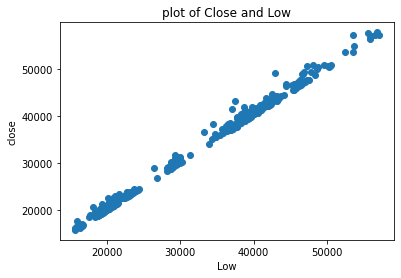

In [ ]:
df_X = df.Low
df_y = df.Close

np_X = df_X.to_numpy()
np_y = df_y.to_numpy()

plt.scatter(np_X,np_y)
plt.title('plot of Close and Low')
plt.xlabel('Low')
plt.ylabel('close')

Text(0, 0.5, 'Volume')

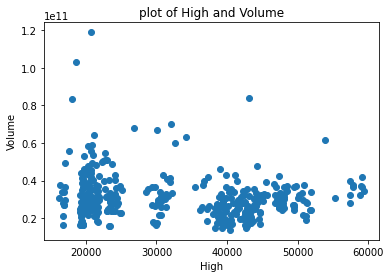

In [ ]:
df_X = df.High
df_y = df.Volume

np_X = df_X.to_numpy()
np_y = df_y.to_numpy()

plt.scatter(np_X,np_y)
plt.title('plot of High and Volume')
plt.xlabel('High')
plt.ylabel('Volume')

#### b - Creating a Stock Dataset

As you might have seen, multiple features are available in the dataset. We will use the attention mecanism to process 5 of the given features. We will use the following features :    
* Open
* High
* Low
* Close
* Volume

We are going to create a Dataset that is conform to Pytorch Dataset class.
The Dataset should take as input :
*    Dataframe(s?)
*    $N_{window}$ : length of the sequence


We're feeding the model Time Series which are sequential datas. Each data $p_{i}$ is part of a sequence of length $N_{window}$. We want to predict what could happen after that data. We are sending the data thanks to a sliding non overlapping window of size $N_{window}$.

In fact, we will be sending $N_{window}$ sequences to the model to learn how to approximate  $f( W_t) \approx W_{t+1}$ \
where :


$W_t = (p_{t_{w}}, p_{t_{w+1}}, \dots, p_{(t+1)_{w-1}})$

We want the dataset to return the following:
for

*    $N_{window}$ = 3


$\text{Input}_1 = [p_0, p_1, p_2], \text{Label}_1 = [p_3, p_4, p_5]$


$\text{Input}_3 = [p_6, p_7, p_8], \text{Label}_3 = [p_9, p_{10}, p_{11}]$

__getitem__ method should return a dictionnary where :
*   dict['input'] : is a list of $N_{window}$ input values
* dict['label'] : is a list of $N_{window}$ target values


In [ ]:
class StockDataset(Dataset):

  def __init__(self, df,N_window,normalized = True,num_steps =1):
      self.df = df
      self.df.dropna(how='any', axis=0,inplace= True)
      self.N_window = N_window
      self.num_steps = num_steps
      self.normalized = normalized
      self.X, self.y = self.process_df()

  def process_df(self):
      """
      process method should return X,y:
      * X is an array of num_steps*N_windows input values
      * y is an array of corresponding target values
      """
      scaler = MinMaxScaler(feature_range=(-1, 1))
      data_raw= self.df.to_numpy()
      close = self.df['Close'].to_numpy()
      open = self.df['Open'].to_numpy()
      high = self.df['High'].to_numpy()
      low = 	self.df['Low'].to_numpy()
      volume = self.df['Volume'].to_numpy()

      if self.normalized :
        close = scaler.fit_transform(close.reshape(-1, 1))
        open = scaler.fit_transform(open.reshape(-1, 1))
        high = scaler.fit_transform(high.reshape(-1, 1))
        low = 	scaler.fit_transform(low.reshape(-1, 1))
        volume = scaler.fit_transform(volume.reshape(-1, 1))

      data_raw = np.stack([close,open,high,low,volume])
      assert len(close)==len(open)==len(high)==len(low)==len(volume)

      # Create a list of sequences of N_window elements
      if data_raw.shape[1]%3 != 0 :
          data_raw_new = data_raw[:,:data_raw.shape[1]-data_raw.shape[1]%3,:]
          seq = data_raw_new.reshape((data_raw.shape[1]//3,self.N_window,5))
      else:
          seq = data_raw.reshape((data_raw.shape[1]//3,self.N_window,5))
      # Return an array of sequences where X is the input values and y the target values
      X = seq[0:len(seq):2]
      y = seq[1:len(seq):2]
      return X,y

  def __len__(self):
      '''
      Be careful on our len because of the overlapping issues
      '''

      return self.X.shape[0]*self.X.shape[1]*self.X.shape[2]

  def __getitem__(self,idx):
      """
      __getitem__ method should return a dictionnary where :
      * dict['input'] : is a list of num_{steps} lists of N_{window} elements
      * dict['label'] : is a list of N_{window} target value
      """
      # Return one element
      x = self.X[idx%self.X.shape[0]]
      y = self.y[idx%self.y.shape[0]]
      return {'input': x,
              'label':y}

In [ ]:
# Verify that our Dataset is correct.

df = df
N_window = 3
normalized = True
dataset = StockDataset(df = df,
                       N_window = N_window,
                       normalized = normalized)


At this moment, each samples will be a dictionnary with a sequence. However, one important feature is hidden in our stock price but we need a proper way to use it.


#### c- Creating the Lightning DataModule

As usual create a Lightning Datamodule that encompasses everything.

In [ ]:
class StockDataModule(pl.LightningDataModule):
    def __init__(self,df,N_window, normalized, batch_size):
        super().__init__()
        self.df = df
        self.N_window = N_window
        self.normalized = normalized
        self.batch_size = batch_size

    def setup(self, stage):
        # First stage is 'fit' (or None)

        X_train, X_test = train_test_split(self.df, shuffle=True)
        X_train, X_valid = train_test_split(X_train, shuffle=True)

        if stage == "fit" or stage is None:
            # We create a validation split to watch the training.
            # As usual
            self.stock_train =  StockDataset(df = X_train, N_window = self.N_window, normalized = self.normalized)
            self.stock_valid =  StockDataset(df = X_valid, N_window = self.N_window, normalized = self.normalized)

        # Second stage is 'test'
        if stage == "test" or stage is None:
            # As usual
            self.stock_test =  StockDataset(df = X_test, N_window = self.N_window, normalized = self.normalized)

    def train_dataloader(self):
        return DataLoader(self.stock_train, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.stock_valid, batch_size = self.batch_size, shuffle=True)

    def test_dataloader(self):
        return DataLoader(self.stock_test,batch_size = self.batch_size, shuffle=True)

In [ ]:
# Initialize our datamodule
Datamodule = StockDataModule(df,3,True,26)

### II - Positional Encoding : Incorporating Time to the features with Time2Vector

Transformers use a positional encoding to provide a sense of word order in a sequence. However, these positional encodings doesn't provide any sens of time. In that way, Time2Vector is a model-agnostic vector representation for time. The main idea of this vector is that :
* a meaningful representation of time has to include both periodic and non-periodic patterns.
* a time representation should have an invariance to time rescaling



Specifically, a Time2Vec Layer is defined as :    
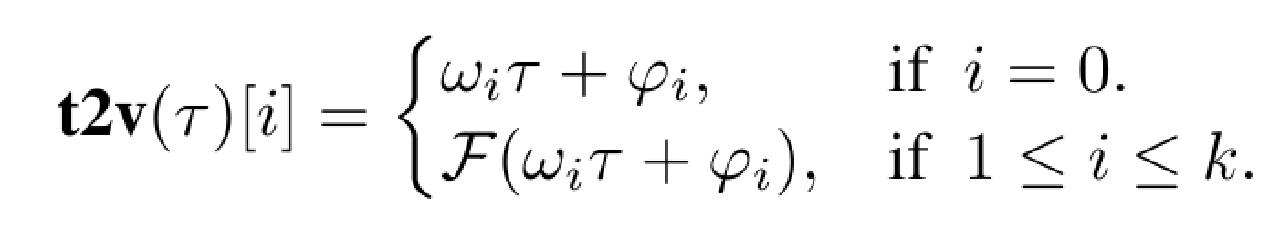

* $\mathcal{F}$ is a periodic function for e.g. sin or cos
* $w_i$, $\varphi_{i}$   are learnable parameters




Let's create a Time2Vec Layer. We need non-periodic feature and a periodic feature.


**Important Disclaimer : Usually we add our positional encoding to our input tensor. However, in our case we will concatenate it.**

In [ ]:
import torch
from torch import nn
import numpy as np
import math

class Time2Vector(nn.Module):

  def __init__(self,in_features):
      super().__init__()
      self.in_features = in_features
      self.w0 = nn.parameter.Parameter(torch.randn(1,1), requires_grad =True)
      self.b0 = nn.parameter.Parameter(torch.randn(in_features, 1), requires_grad =True)
      self.w = nn.parameter.Parameter(torch.randn(1,1), requires_grad =True)
      self.b = nn.parameter.Parameter(torch.randn(in_features, 1), requires_grad =True)
      self.f = torch.sin


  def forward(self,x):
      bs, seq_len, n_feat = x.shape
      # Exclude the unwanted feature and compute the mean along the last axis
      x = torch.mean(x[:,:-1,:],1)

      linear = x.unsqueeze(-1)
      periodic = x.unsqueeze(-1)
      linear = torch.matmul(linear,self.w0) + self.b0
      W = self.w.repeat(bs,1,1)
      b = self.b.repeat(bs,1,1)
      periodic = self.f(torch.bmm(periodic,W) + b)
      return torch.cat([linear, periodic], -1).permute(0,2,1)

# Verify the output of Time2Vector shape. It should be of shape (Batch Size, Sequence Length, 2)
Time2Vector(128).forward(torch.rand(32,5,128)).shape

torch.Size([32, 2, 128])

### III - Transformer : A Big Model around Attention

We are going to build each modules of our Transformer model. The heart of the model resides in the Attention Mecanism. The goal of the Attention mecanism is to force the model to look at specific part of the input. We will build each component of the transformer part by part.


Create the different components of the Transformer Encoder :
* Attention Module
* Multi-Head Attention Module
* Transformer Encoder Layer
* Transformer Encoder

#### a - Attention layer

Let's compute the attention layer. We will create a layer that computes Bandhanau's attention also called Dot Scale Product attention. The attention mecanism takes an input $X$ and project it using a set of queries, keys and values. Think of it as a Database which you query (with the queries) using a set of keys, which returns a set values.

Mathematicaly speaking, we are computing the scaled dot product between $Q$, $K$, $V$


The  attention is :
$Attention(Q,K,V)$ =  $Softmax(\frac{Q*K}{\sqrt{dim}})$$*V$

<img src="https://production-media.paperswithcode.com/methods/SCALDE.png" height = 400>

In [ ]:
class Attention(nn.Module):

  def __init__(self, dim_query):
    super().__init__()
    self.dim_query = dim_query


  def forward(self,q,k,v):
    # Compute the attention mecanism between q,k,v
    attn = torch.bmm(q,k)/math.sqrt(self.dim_query)
    attn = F.softmax(attn,-1)
    context = torch.bmm(attn,v)
    return context, attn


#### b - Multi head Attention

Usually, we like creating a Multi-Head Attention layer. Multi-Head only means that we are computing the attention over multiple heads. In fact, instead of having only one function computed by the attention mecanism, we leave each head free to learn a different function. Hence, we will have different outputs each computing a different value.

Mathematically speaking :

$MultiHead(Q,K,V)=Concat(head_1,…,head_h)W^O$

with $head_i=Attention(QW_i^Q,KW_i^K,VW_i^V).$


<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTv6Bgq7bdnXdT-JDWEnnzK2EM1xY0NUEOyBg&usqp=CAU'>

In [ ]:
class MultiHeadAttention(nn.Module):

  def __init__(self, embed_dim, dim_query, dim_value,num_heads):
        super().__init__()

        # Embed dim is the shape of the feature space
        self.embed_dim = embed_dim
        # Num Heads is the number of heads
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.w_query = nn.Linear(embed_dim, num_heads*dim_query)
        self.w_key = nn.Linear(embed_dim, num_heads*dim_query)
        self.w_value = nn.Linear(embed_dim, num_heads*dim_value)
        self.linear = nn.Linear(num_heads*dim_value, embed_dim)
        # Dim Query, Dim Value are the projected dimensions of each tensors
        self.attention = Attention(dim_query)


  def forward(self, query, key, value):

      # Project our query, key, value into their respective heads
      q = self.w_query(query)
      k = self.w_key(key)
      v = self.w_value(value)
      # Compute the attention
      attn, context  = self.attention(q,k,v)
      attn = self.linear(attn)
      return attn, context

#### c - Transforming the Transformer

So let's create our Transformer model. We will just create the Encoder, as we don't need the Decoder in our case. We are just trying to Encode the input and find interesting patterns.
Usually we code the Transformer Model into a specific format :
* Layer Class
* Model Class

<img src="https://www.researchgate.net/publication/334288604/figure/fig1/AS:778232232148992@1562556431066/The-Transformer-encoder-structure.ppm" height=400>

In [ ]:
# Create one Transformer Encoder Layer
class TransformerEncoderLayer(nn.Module):

  def __init__(self,embed_dim, dim_query, dim_value, num_heads, dim_feedforward= 256,dropout = 0.1):
      super().__init__()
      self.attention = MultiHeadAttention(embed_dim,
                                          dim_query,
                                          dim_value,
                                          num_heads)

      self.linear= nn.Sequential(nn.Linear(embed_dim, dim_feedforward),
                                  nn.ReLU(),
                                  nn.Dropout(dropout),
                                  nn.ReLU(),
                                  nn.Linear(dim_feedforward, embed_dim))

      self.norm1 = nn.LayerNorm(embed_dim)
      self.norm2 = nn.LayerNorm(embed_dim)
      self.dropout1 = nn.Dropout(dropout)
      self.dropout2 = nn.Dropout(dropout)



  def forward(self, sequence):
      q=k=v= sequence.double()
      # Compute the attention
      attn, context =  self.attention(q,k,v)
      sequence = sequence + self.dropout1(attn)
      sequence = self.norm1(sequence)
      sequence = self.linear(sequence)
      sequence = sequence +  self.dropout2(sequence)
      sequence = self.norm2(sequence)
      return sequence

# Create a Transformer Encoder.
class TransformerEncoder(nn.Module):
  def __init__(self, encoder_layer, num_layers):
          super().__init__()
          self.layers = _get_clones(encoder_layer, num_layers)
          self.num_layers = num_layers

  def forward(self, sequence):
        output = sequence.permute(2,0,1)
        for layer in self.layers:
            # Send our Input to our transformer
            output = layer(output)
        return output


#### Building the entire model

Finally let's build the entire model. Let's use Pytorch-Lightning to encompass everything.
Normally our model must be composed of three components :
* The Transformer
* The Time2Vector
* A Regression Head

As usual ask ourself what task you are performing, how our data should travle trhough the model, what the data is, blablablablalablba

Don't forget to use our favorite logger.

In [ ]:
class StockModel(pl.LightningModule):
    def __init__(self,embed_dim,dim_query,dim_value, num_layers, num_heads):
        super().__init__()
        self.save_hyperparameters()
        # Define our model here, be careful, our model will be an instance of the class. Watch  out for the input data.
        # TOOD : Define our Encoder Layer
        encoder_layer = TransformerEncoderLayer(embed_dim = embed_dim,
                                                dim_query = dim_query,
                                                dim_value = dim_value,
                                                num_heads = num_heads,
                                                dim_feedforward= 256,
                                                dropout = 0.1)

        # Initialize our Transformer
        self.transformer = TransformerEncoder(encoder_layer = encoder_layer,
                                              num_layers = num_layers)
        # Initialize our regression head
        self.head = nn.Linear(num_layers,5) # What is our input hidden dim, output hidden dim ? Don't forget our time embedding
        # Initialize our Time2Vector Embeddings
        self.timeencoder = Time2Vector(3)
        self.loss = nn.MSELoss()



    def forward(self,x):
        bs,h,len = x.shape
        pos = x.permute(0,2,1)
        time_vec = self.timeencoder(pos)
        # Concatenate our time embedding to the input sequence
        x = torch.cat((time_vec,time_vec,time_vec), dim = 1) # Verify that the tensor was correctly concatenated within the feature dim
        # Send our input through our transformer
        x = self.transformer(x)
        x = x.view(bs*h, -1)
        # Send our input through the regression head
        x = self.head(x)
        x = x.view(bs,-1,len)
        return x

    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.9)
        return optimizer


    def training_step(self, batch, batch_idx):
        # Define our Training Step
        X,y = batch['input'],batch['label']
        out = self.forward(X)
        loss = self.loss(out,y)
        # Don't remove the next line, you will understand why later
        self.log('train_loss', loss)
        return loss


    def validation_step(self, batch, batch_idx):
        # Define our Validation Step
        X,y = batch['input'],batch['label']
        out = self.forward(X)
        loss = self.loss(out,y)
        # Don't remove the next line, you will understand why later
        self.log('val_loss', loss)

    def test_step(self, batch, batch_idx):
        # Define our Test Step
        X,y = batch['input'],batch['label']
        out = self.forward(X)
        loss = self.loss(out,y)
        self.log('test_loss', loss)


## IV - Training the Model



In [ ]:
# Initalize Model, Datamodule and Trainer
embed_dim = 6
num_heads = 30
dim_query = 1
dim_value = 1
num_layers = 6

model = StockModel(embed_dim=embed_dim,
                      dim_query=dim_query,
                      dim_value=dim_value,
                      num_layers=num_layers,
                      num_heads= num_heads).double()


dm = StockDataModule(df,3,True,num_heads)

logger = WandbLogger(name='transformer_scratch',project='transformer_classif')

trainer = pl.Trainer(gpus=-1,
                     max_epochs=300,
                     default_root_dir="transformer_classification",
                     logger=logger)

trainer.fit(model, dm)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loggers/wandb.py:397: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  "There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse"
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=-1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=-1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightn

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:491: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1562: PossibleUserWarning: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


## V - Testing the model : Inference

Now that the model is trained, testing it is a key to become rich.

#### a - Testings

Test the model on the test dataset.

**Illustrate our arguments using charts or any kind of visual materials supporting our analysis. Any non illustrated analysis won't be taken into account**

In [ ]:
dm.setup("test")
# Load our test dataloader from the datamodule
test = dm.test_dataloader()

# Compute our average reconstruction on the test set.
trainer.test(model = model,dataloaders = test)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:491: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

RuntimeError: ignored

#### b - Further Testings

Test the model on a different dataset.

**Illustrate our arguments using charts or any kind of visual materials supporting our analysis. Any non illustrated analysis won't be taken into account**
